# Homework 1 for CS 247 : Advanced Data Mining Learning

### Due: 11:59 pm 04/07


__Name__: Chiao Lu

__UID__: 204848946

## Problem 1 Multinomial Naive Bayes Optimization

For multinomial naive Bayes model, prove the MLE estimator β for what is stated in Slide 21.

#### Write Your answer here:

We want to maximize $$\sum_{d}\sum_{n}{x_{dn}\log{(\beta_{y_dn})}}=\sum_{d}\sum_{n}\sum_{j}{x_{dn}\mathbb{1}\left(y_d=j\right)\log{\left(\beta_{jn}\right)}}$$.
<br>
Let $$F\left(\beta_{jn}\right)$$ be the above expression.
<br>
Now, $$\frac{\partial F}{\partial\beta_{jn}}=\sum_{d}{x_{dn}\mathbb{1}\left(y_d=j\right)\times\frac{1}{\beta_{jn}}}$$
<br>
With $$\frac{\partial F}{\partial\beta_{jn}}=\sum_{d}{x_{dn}\mathbb{1}\left(y_d=j\right)\times\frac{1}{\beta_{jn}}}=\lambda$$ solve for $$\lambda$$ using the fact that $$\sum_{n}{\beta_{jn}}=1$$, we get $$\lambda=\sum_{d}{\sum_{n}{x_{dn}1(y_{d}=j)}}$$
<br>
Substitute the $$\lambda$$ into above and get $$\beta_{jn}=\frac{\sum_{d}{x_{dn}1(y_{d}=j)}}{\sum_{d}{\sum_{n}{x_{dn}1(y_{d}=j)}}}$$, which is equivalent to the expression given in the lecture slides.


## Problem 2:  Multinomial Naive Bayes Implementation


In this problem, we'd like you to implement naive bayes, and apply it on a real-world sentiment classification dataset. 

1. We've provided a general framework "My_MultinomialNB" below, please fill ''TODO'' slots. More specifically, you should implement the ***fit***, ***predict_proba_without_log*** and ***predict_log_proba_with_log*** functions. 

    For function ***fit***, given a training dataset with feature ***X*** and label ***y***, we'd like you to calculate ***beta*** and ***pi*** with a smoothing parameter ***alpha*** (laplace smoothing). 

    For ***predict_proba_without_log***, given a test dataset with feature X, we'd like you to calculate the predicted probability of each data point using what we've learned in class.

    For ***predict_log_proba_with_log***, given a test dataset with feature ***X***, we'd like you to calculate the log probability of each data point, using ***log_beta*** and ***log_pi***. With this function, we can also get probability using ***predict_proba_with_log***

In [123]:
import numpy as np
class My_MultinomialNB():
    """
    Multinomial Naive Bayes (MultinomialNB)
    ==========  
    Parameters
    ----------
    alpha : float, optional (default=1.0)
        Additive (Laplace/Lidstone) smoothing parameter
        (0 for no smoothing).
    """

    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, X, y):
        self.class_indicator = {}
        for i, c in enumerate(np.unique(y)):
            self.class_indicator[c] = i
        self.n_class = len(self.class_indicator)
        self.n_feats = np.shape(X)[1]
        
        self.beta    = np.zeros((self.n_class, self.n_feats))
        self.pi      = np.zeros((self.n_class))
        '''
            TODO: Calculate self.beta and self.pi
        '''
        for row in range(self.beta.shape[0]):
            X_correct_class = X[y==row]
            numerator = np.sum(X_correct_class, axis=0)
            denominator = np.sum(numerator)
            numerator += self.alpha
            denominator += self.alpha*self.n_feats
            self.beta[row] = numerator/denominator
        self.pi = np.unique(y, return_counts=True)[1]/len(y)
        self.log_beta = np.log(self.beta)
        self.log_pi   = np.log(self.pi)
        
    def predict(self, X, with_log = True):
        if with_log:
            probability = self.predict_proba_with_log(X)
        else:
            probability = self.predict_proba_without_log(X)
        return np.argmax(probability, axis=1)    
    
    def predict_proba_without_log(self, X):
        prob = np.zeros((len(X), self.n_class))
        '''
            TODO: Calculate probability of which class each data belongs to, using self.beta and self.pi
        '''
        for sample_idx in range(len(X)):
            prob[sample_idx] = self.pi * (np.prod(np.power(self.beta, X[sample_idx]), axis=1))
        return prob
    
    def predict_proba_with_log(self, X):
        log_prob = self.predict_log_proba_with_log(X)
        return np.exp(log_prob - np.max(log_prob, axis=1).reshape(-1, 1))
    
    def predict_log_proba_with_log(self, X):
        log_prob = np.zeros((len(X), self.n_class))
        '''
            TODO: Calculate log-probability of which class each data belongs to, using self.log_beta and self.log_pi
        '''
        for sample_idx in range(len(X)):
            # log_prob[sample_idx] = self.log_pi + np.sum(np.prod(self.log_beta, X[sample_idx]), axis=1)
            # print(np.prod(self.log_beta, X[sample_idx]))
            # print(self.log_beta.shape)
            # print(X[sample_idx].shape)
            # import time
            # time.sleep(3600)
            log_prob[sample_idx] = self.log_pi + np.sum(self.log_beta*X[sample_idx], axis=1)        
        
        return log_prob

2. Try your Multinomial Naive Bayes Implementation on a real-world dataset and compare with the model implemented in *sklearn*.
   
    We've already provided the data processing code below, which will help you download 20newsgroups dataset and extract word frequency feature for each document. We also provide the code for training and predict the probability of test data, using *sklearn* implementation.
    
    Now, try to train the model you implement, and calculate the probability of test data using ***predict_proba_without_log*** and ***predict_log_proba_with_log***. Compare the result with what we got by *sklearn* model, are they same or not? If they are different, please try to explain the reason.

In [12]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian',  'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test  = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
count_vect = CountVectorizer().fit(twenty_train['data'] + twenty_test['data'])
X_train_feature = count_vect.transform(twenty_train['data']).toarray()
X_test_feature  = count_vect.transform(twenty_test['data']).toarray()

In [106]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_feature, twenty_train.target)
pred_proba = clf.predict_proba(X_test_feature)
pred = clf.predict(X_test_feature)

In [124]:
my_clf = My_MultinomialNB()
'''
    TODO: Train your model, and then get the probability result using "predict_proba_without_log" and "predict_proba_with_log"
'''

'\n    TODO: Train your model, and then get the probability result using "predict_proba_without_log" and "predict_proba_with_log"\n'

In [128]:
my_clf.fit(X_train_feature, twenty_train.target)
pred_proba_without_log = my_clf.predict_proba_without_log(X_test_feature)
pred_proba_with_log = my_clf.predict_proba_with_log(X_test_feature)
print("Is pred_proba_without_log from my_clf close to pred_proba from sklearn? {}".format(np.allclose(pred_proba, pred_proba_without_log)))
print("Is pred_proba_with_log from my_clf close to pred_proba from sklearn? {}".format(np.allclose(pred_proba, pred_proba_with_log)))
from sklearn.metrics import accuracy_score
print("Test accuracy of sklearn model: {}".format(accuracy_score(twenty_test.target, pred)))
print("Test accuracy of our model (without log): {}".format(accuracy_score(twenty_test.target, my_clf.predict(X_test_feature, with_log=False))))
my_pred_with_log = my_clf.predict(X_test_feature, with_log=True)
print("Test accuracy of our model (with log): {}".format(accuracy_score(twenty_test.target, my_pred_with_log)))
print("Does my_clf (with log) give the same prediction as sklearn? {}".format(np.array_equal(my_pred_with_log, pred)))

Is pred_proba_without_log from my_clf close to pred_proba from sklearn? False
Is pred_proba_with_log from my_clf close to pred_proba from sklearn? False
Test accuracy of sklearn model: 0.9347536617842876
Test accuracy of our model (without log): 0.36684420772303594
Test accuracy of our model (with log): 0.9347536617842876
Does my_clf (with log) give the same prediction as sklearn? True


Since sklearn performs normalization but we don't, there will be difference in the actual probability values; the predicted labels are identical, though. Also, the non-log version doesn't yield reasonable results because of overflowing issues.

2. Now, provide the evaluation result of your model, using accuracy as evaluation metric. 
    Next, choose different laplacian smoothing parameter ***alpha***, including (0, 0.001, 0.01, 0.1, 1, 10, 100, 1000). Plot the accuracy curve with different ***alpha*** using *matplotlib* package or *seaborn* package. 
    
3. What is the best ***alpha***? Please explain why when ***alpha*** = 0 and ***alpha*** = 1000, the performance is relatively worse than the best case.

In [89]:
def accuracy(y_true, y_pred):
    '''
        TODO: Implement accuracy metric
    '''
    assert len(y_pred) == len(y_true)
    return ((y_pred == y_true).sum())/len(y_true)

accs = []
for alpha in [0, 0.001, 0.1, 1, 10, 100, 1000, 10000]:
    '''
        TODO: Train the model with different alpha, and get corresponding a
    '''
    print("Predicting when alpha is {}.".format(alpha))
    clf = My_MultinomialNB(alpha=alpha)
    clf.fit(X_train_feature, twenty_train.target)
    pred = clf.predict(X_test_feature, with_log=True)
    a = accuracy(twenty_test.target, pred)
    accs.append(a)

Predicting when alpha is 0.
Predicting when alpha is 0.001.
Predicting when alpha is 0.1.
Predicting when alpha is 1.
Predicting when alpha is 10.
Predicting when alpha is 100.
Predicting when alpha is 1000.
Predicting when alpha is 10000.


<ipython-input-80-72195c3d5677>:34: RuntimeWarning: divide by zero encountered in log
  self.log_beta = np.log(self.beta)
<ipython-input-80-72195c3d5677>:69: RuntimeWarning: invalid value encountered in multiply
  log_prob[sample_idx] = self.log_pi + np.sum(self.log_beta*X[sample_idx], axis=1)


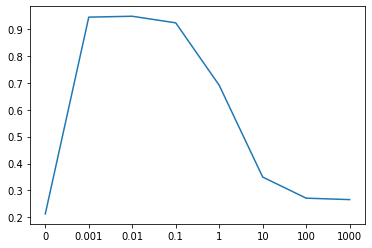

In [90]:
import matplotlib.pyplot as plt
plt.plot(accs)
plt.xticks(np.arange(8), [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
plt.show()

From the plot above, $$\alpha$$ being 0.001 gives the best accuracy.
<br><br>
$$\alpha$$ being 0 performs really bad because it means that there's no smoothing. $$\beta_{jn}$$ will degrade to 0 often.
<br><br>
$$\alpha$$ being 10000 also performs really bad because since $$\beta_{jn}=\frac{\mathrm{something}+\alpha}{\mathrm{somethingelse}+\alpha N}$$. With $$\alpha\rightarrow\infty, \beta\rightarrow\frac{1}{N}$$ which is just a constant.